### Caso de aprendizado de máquina de regressão Projeto de estudo

Como você trabalha com um problema de aprendizado de máquina de modelagem preditiva de ponta a ponta? Nisso
lição você trabalhará através de um problema de modelagem preditiva de regressão de estudo de caso em Python
incluindo cada etapa do processo de aprendizado de máquina aplicado. Depois de concluir este projeto, você
saberá:

. Como trabalhar com um problema de modelagem preditiva de regressão de ponta a ponta.

. Como usar transformações de dados para melhorar o desempenho do modelo.

. Como usar o ajuste de algoritmo para melhorar o desempenho do modelo.

. Como usar métodos de conjunto e ajuste de métodos de conjunto para melhorar o desempenho do modelo
mance.

#### Definição do Problema

Para este projeto, investigaremos o conjunto de dados Boston House Price. Cada registro no banco de dados
descreve um subúrbio ou cidade de Boston. Os dados foram extraídos do Boston Standard Metropolitan
Área Estatística (SMSA) em 1970. Os atributos são de nidos da seguinte forma (retirados do UCI
Repositório de aprendizado de máquina1):

1. CRIM: taxa de criminalidade per capita por cidade
2. ZN: proporção de terreno residencial zoneada para lotes acima de 25.000 m2.
3. INDUS: proporção de hectares de negócios não varejistas por cidade
4. CHAS: Variável fictícia Charles River (= 1 se o trecho limita o rio; 0 caso contrário)
5. NOX: concentração de óxidos nítricos (partes por 10 milhões)
6. RM: número médio de divisões por habitação
7. IDADE: proporção de unidades próprias construídas antes de 1940
8. DIS: distâncias ponderadas para cinco centros de emprego de Boston
9. RAD: índice de acessibilidade às rodovias radiais
10. IMPOSTO: valor total do imposto predial por US$ 10.000
11. PTRATIO: proporção aluno-professor por município
12. B: 1000(Bk 0:63)2 onde Bk é a proporção de negros por cidade
13. LSTAT: % de status inferior da população
14. MEDV: Valor médio de residências ocupadas pelos proprietários em US$ 1.000

Podemos ver que os atributos de entrada possuem uma mistura de unidades.

#### Load the Dataset

Vamos começar carregando as bibliotecas necessárias para este projeto.

In [2]:
# Load libraries
import numpy
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

Agora podemos carregar o conjunto de dados que você pode baixar do UCI Machine Learning
site do repositório.

In [3]:
# Load dataset
filename = 'datasets/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 
         'CHAS', 'NOX', 'RM',
         'AGE', 'DIS', 'RAD', 
         'TAX', 'PTRATIO','B', 
         'LSTAT', 'MEDV']

dataset = read_csv(filename,header=0, names=names)

Você pode ver que estamos especificando os nomes curtos para cada atributo para que possamos fazer referência
eles claramente mais tarde. Você também pode ver que os atributos são delimitados por espaços em branco em vez de
vírgulas neste arquivo e indicamos isso para ler a função csv () por meio do espaço em branco delim
argumento. Agora temos nossos dados carregados.

#### Analisar dados

Agora podemos dar uma olhada mais de perto em nossos dados carregados.

##### Estatísticas descritivas

Vamos começar confirmando as dimensões do conjunto de dados, por exemplo o número de linhas e colunas.

In [4]:
# shape
print(dataset.shape)

(506, 14)


Temos 506 instâncias para trabalhar e podemos confirmar que os dados têm 14 atributos, incluindo
o atributo de saída MEDV.

Vejamos também os tipos de dados de cada atributo.

In [5]:
# types
print(dataset.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


Podemos ver que todos os atributos são numéricos, principalmente valores reais (
aveia) e alguns têm
interpretado como inteiros (int).

Vamos agora dar uma olhada nas primeiras 20 linhas dos dados.

In [6]:
# head
print(dataset.head(20))

       CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0   0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296.0   
1   0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242.0   
2   0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242.0   
3   0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222.0   
4   0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222.0   
5   0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222.0   
6   0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311.0   
7   0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311.0   
8   0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311.0   
9   0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311.0   
10  0.22489  12.5   7.87     0  0.524  6.377   94.3  6.3467    5  311.0   
11  0.11747  12.5   7.87     0  0.524  6.009   82.9  6.2267    5  311.0   
12  0.09378  12.5   7.87 

Podemos confirmar que as escalas para os atributos estão em todo lugar por causa da diferença
unidades. Podemos nos beneficiar de algumas transformações mais tarde.

Vamos resumir a distribuição de cada atributo.

In [17]:
# descriptions
set_option('display.precision', 1)
print(dataset.describe())

        CRIM     ZN  INDUS     CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
count  506.0  506.0  506.0  5.1e+02  506.0  506.0  506.0  506.0  506.0  506.0   
mean     3.6   11.4   11.1  6.9e-02    0.6    6.3   68.6    3.8    9.5  408.2   
...      ...    ...    ...      ...    ...    ...    ...    ...    ...    ...   
75%      3.7   12.5   18.1  0.0e+00    0.6    6.6   94.1    5.2   24.0  666.0   
max     89.0  100.0   27.7  1.0e+00    0.9    8.8  100.0   12.1   24.0  711.0   

       PTRATIO      B  LSTAT   MEDV  
count    506.0  506.0  506.0  506.0  
mean      18.5  356.7   12.7   22.5  
...        ...    ...    ...    ...  
75%       20.2  396.2   17.0   25.0  
max       22.0  396.9   38.0   50.0  

[8 rows x 14 columns]


Agora temos uma ideia melhor de quão diferentes são os atributos. Os valores mínimo e máximo
também são os meios variam muito. Provavelmente obteremos melhores resultados redimensionando os dados
de algum modo.

Agora, vamos dar uma olhada na correlação entre todos os atributos numéricos.

In [18]:
# correlation
set_option('display.precision', 1)
print(dataset.corr(method='pearson'))

       CRIM   ZN  INDUS     CHAS  NOX   RM  AGE  DIS  RAD  TAX  PTRATIO    B  \
CRIM    1.0 -0.2    0.4 -5.6e-02  0.4 -0.2  0.4 -0.4  0.6  0.6      0.3 -0.4   
ZN     -0.2  1.0   -0.5 -4.3e-02 -0.5  0.3 -0.6  0.7 -0.3 -0.3     -0.4  0.2   
...     ...  ...    ...      ...  ...  ...  ...  ...  ...  ...      ...  ...   
LSTAT   0.5 -0.4    0.6 -5.4e-02  0.6 -0.6  0.6 -0.5  0.5  0.5      0.4 -0.4   
MEDV   -0.4  0.4   -0.5  1.8e-01 -0.4  0.7 -0.4  0.2 -0.4 -0.5     -0.5  0.3   

       LSTAT  MEDV  
CRIM     0.5  -0.4  
ZN      -0.4   0.4  
...      ...   ...  
LSTAT    1.0  -0.7  
MEDV    -0.7   1.0  

[14 rows x 14 columns]


Isto é interessante. Podemos ver que muitos dos atributos têm uma forte correlação (por exemplo, > 0,70 ou < -0,70). Por exemplo:

. NOX e INDUS com 0,77.

. DIS e INDUS com -0,71.

. IMPOSTO e INDUS com 0,72.
. IDADE e NOX com 0,73.

. DIS e NOX com -0,78.

Também parece que LSTAT tem uma boa correlação negativa com a variável de saída MEDV com
um valor de -0,74.

#### Visualizações de dados

##### Visualizações de dados unimodais

Vejamos as visualizações de atributos individuais. Muitas vezes é útil olhar para os seus dados
usando várias visualizações diferentes para gerar ideias. Vejamos os histogramas de cada
atributo para obter uma noção das distribuições de dados.

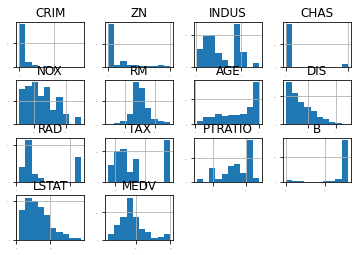

In [19]:
# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
pyplot.show()

Podemos ver que alguns atributos podem ter uma distribuição exponencial, como CRIM, ZN,
AGE e B. Podemos ver que outros podem ter uma distribuição bimodal como RAD e TAX.

Vejamos as mesmas distribuições usando gráficos de densidade que as suavizam um pouco.

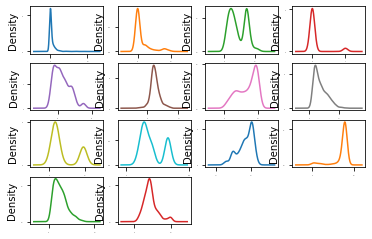

In [20]:
# density
dataset.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=False,
fontsize=1)
pyplot.show()

Isso talvez acrescente mais evidências à nossa suspeita sobre possível exponencial e bimodal
distribuições. Também parece que NOX, RM e LSTAT podem ser distribuições gaussianas distorcidas, que
pode ser útil mais tarde com transformações.

Vejamos os dados com gráficos de caixa e bigodes de cada atributo.

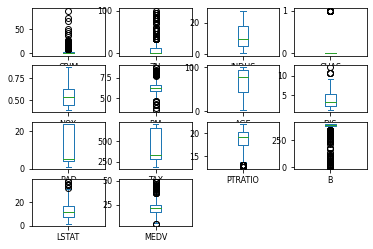

In [21]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,
fontsize=8)
pyplot.show()

Isso ajuda a apontar a distorção em muitas distribuições tanto que os dados parecem discrepantes
(por exemplo, além do bigode das parcelas).

##### Visualizações de dados multimodais

Vejamos algumas visualizações das interações entre variáveis. O melhor lugar para começar
é uma matriz de gráfico de dispersão.

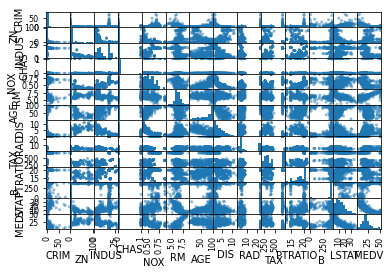

In [22]:
# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

Podemos ver que alguns dos atributos correlacionados mais altos mostram uma boa estrutura em seus
relação. Não linear, mas boas relações curvas previsíveis.

Vamos também visualizar as correlações entre os atributos.

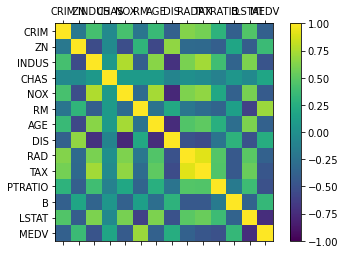

In [23]:
# correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = numpy.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()

A cor vermelha escura mostra correlação positiva, enquanto a cor azul escura mostra correlação negativa
correlação. Também podemos ver alguns vermelhos escuros e azuis escuros que sugerem candidatos para remoção
para melhorar a precisão dos modelos posteriormente.

#### Resumo das Ideias

Há muita estrutura neste conjunto de dados. Precisamos pensar em transformações que poderíamos usar
posteriormente para expor melhor a estrutura que, por sua vez, pode melhorar a precisão da modelagem. até agora
valeria a pena tentar:

. Seleção de recursos e remoção dos atributos mais correlacionados.
. Normalizando o conjunto de dados para reduzir o efeito de escalas diferentes.
. Padronizar o conjunto de dados para reduzir os efeitos de diferentes distribuições.

Com muito tempo adicional, eu também exploraria a possibilidade de binning (discretização)
dos dados. Isso geralmente pode melhorar a precisão dos algoritmos de árvore de decisão.

#### Conjunto de dados de validação

É uma boa ideia usar um conjunto de validação. Esta é uma amostra dos dados que mantemos
de volta de nossa análise e modelagem. Nós o usamos logo no final do nosso projeto para con rmar o
precisão do nosso modelo nal. É um teste de fumaça que podemos usar para ver se erramos e nos dê confiança em nossas estimativas de precisão em dados não vistos. Usaremos 80% do conjunto de dados
para modelagem e reter 20% para validação.

In [24]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:13]
Y = array[:,13]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
                                                                test_size=validation_size, 
                                                                random_state=seed)

#### Avaliar algoritmos: linha de base

Não temos ideia de quais algoritmos se sairão bem nesse problema. Intuição sugere regressão
algoritmos como Linear Regression e ElasticNet podem funcionar bem. Também é possível que a decisão
árvores e até SVM podem funcionar bem. Eu não faço ideia. Vamos projetar nosso equipamento de teste. Nós vamos usar
Validação cruzada de 10 vezes. O conjunto de dados não é muito pequeno e este é um bom equipamento de teste padrão
configuração. Avaliaremos algoritmos usando a métrica Mean Squared Error (MSE). MSE
dará uma ideia grosseira de quão erradas estão todas as previsões (0 é perfeito).

In [25]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

Vamos criar uma linha de base de desempenho neste problema e verificar no local uma série de diferentes
algoritmos. Vamos selecionar um conjunto de diferentes algoritmos capazes de trabalhar nesta regressão
problema. Os seis algoritmos selecionados incluem:

. Algoritmos Lineares: Regressão Linear (LR), Regressão Lasso (LASSO) e ElasticNet
(PT).

. Algoritmos Não Lineares: Árvores de Classificação e Regressão (CART), Vetor de Suporte
Regressão (SVR) e k-vizinhos mais próximos (KNN).

In [26]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

Todos os algoritmos usam parâmetros de ajuste padrão. Vamos comparar os algoritmos. Vamos
exibir a média e o desvio padrão do MSE para cada algoritmo à medida que o calculamos e
coletar os resultados para uso posterior.

In [29]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -22.006009 (12.188886)
LASSO: -27.105803 (13.165915)
EN: -27.923014 (13.156405)
KNN: -39.808936 (16.507968)
CART: -28.895875 (21.218791)
SVR: -67.824705 (32.801530)


Parece que LR tem o MSE mais baixo, seguido de perto por CART.

Vamos dar uma olhada na distribuição de pontuações em todas as dobras de validação cruzada por algoritmo.

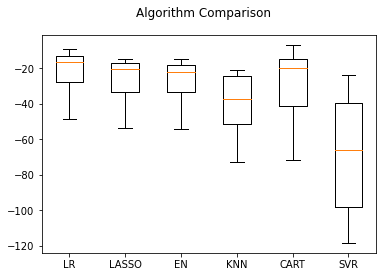

In [30]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

Podemos ver distribuições semelhantes para os algoritmos de regressão e talvez uma distribuição mais restrita de pontuações para CART.

As diferentes escalas dos dados provavelmente estão prejudicando a habilidade de todos os algoritmos e
talvez mais ainda para SVR e KNN. Na próxima seção, veremos como executar o mesmo
algoritmos usando uma cópia padronizada dos dados.

#### Avaliar algoritmos: padronização

Suspeitamos que as diferentes escalas dos dados brutos possam estar afetando negativamente a habilidade de
alguns dos algoritmos. Vamos avaliar os mesmos algoritmos com uma cópia padronizada do
conjunto de dados. É aqui que os dados são transformados de forma que cada atributo tenha um valor médio de
zero e um desvio padrão de 1. Também precisamos evitar vazamento de dados quando transformamos o
dados. Uma boa forma de evitar vazamentos é usar pipelines que padronizam os dados e constroem o
modelo para cada dobra no chicote de teste de validação cruzada. Dessa forma, podemos obter uma estimativa justa
de como cada modelo com dados padronizados pode funcionar em dados não vistos.

In [32]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',
Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',
ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -22.006009 (12.188886)
ScaledLASSO: -27.205896 (12.124418)
ScaledEN: -28.301160 (13.609110)
ScaledKNN: -21.456867 (15.016218)
ScaledCART: -25.216676 (18.391091)
ScaledSVR: -29.570433 (18.052964)


A execução do exemplo fornece uma lista de erros quadráticos médios. Podemos ver que o escalonamento fez
têm um efeito sobre o KNN, gerando um erro menor do que os outros modelos.

Vamos dar uma olhada na distribuição das pontuações nas dobras de validação cruzada.

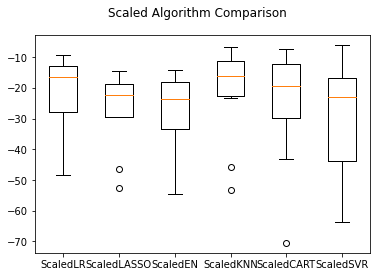

In [33]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

Podemos ver que KNN tem uma distribuição restrita de erros e tem a pontuação mais baixa.

#### Melhore os resultados com o ajuste

Sabemos pelos resultados da seção anterior que KNN alcança bons resultados em escala
versão do conjunto de dados. Mas pode fazer melhor. O valor padrão para o número de vizinhos em
KNN é 7. Podemos usar uma pesquisa em grade para tentar um conjunto de diferentes números de vizinhos e ver se
pode melhorar a pontuação. O exemplo abaixo tenta valores k ímpares de 1 a 21, um intervalo arbitrário
cobrindo um bom valor conhecido de 7. Cada valor k (n vizinhos) é avaliado usando um cruzamento de 10 vezes
validação em uma cópia padronizada do conjunto de dados de treinamento.

In [34]:
# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

Podemos exibir as pontuações de média e desvio padrão, bem como o valor de melhor desempenho
para k abaixo.

In [35]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -19.497829 using {'n_neighbors': 1}
-19.497829 (15.769847) with: {'n_neighbors': 1}
-19.977984 (13.803973) with: {'n_neighbors': 3}
-21.270967 (14.833544) with: {'n_neighbors': 5}
-21.577292 (14.952592) with: {'n_neighbors': 7}
-21.001075 (14.701297) with: {'n_neighbors': 9}
-21.490306 (14.866957) with: {'n_neighbors': 11}
-21.268533 (14.454969) with: {'n_neighbors': 13}
-21.968092 (14.209894) with: {'n_neighbors': 15}
-22.739880 (14.492752) with: {'n_neighbors': 17}
-23.506901 (14.903224) with: {'n_neighbors': 19}
-24.240303 (15.156565) with: {'n_neighbors': 21}


Você pode ver que o melhor para k (n vizinhos) é 3, fornecendo um erro médio quadrado de
-18.172137, o melhor até agora.

#### Métodos de conjunto( Ensemble )

Outra maneira de melhorar o desempenho dos algoritmos nesse problema é usando
métodos de conjunto. Nesta seção, avaliaremos quatro métodos diferentes de aprendizado de máquina ensemble
algoritmos, dois métodos boosting e dois bagging:

. Métodos de Boosting: AdaBoost (AB) e Gradient Boosting (GBM).
. Métodos de ensacamento: Random Forests (RF) e Extra Trees (ET).

Usaremos o mesmo equipamento de teste de antes, validação cruzada de 10 vezes e pipelines que
padronizar os dados de treinamento para cada dobra.

In [37]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB',
AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM',
GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',
RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET',
ExtraTreesRegressor())])))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: -15.499475 (8.150637)
ScaledGBM: -10.930720 (8.694677)
ScaledRF: -12.302654 (9.550338)
ScaledET: -8.961362 (6.672542)


A execução do exemplo calcula o erro quadrático médio para cada método usando o padrão
parâmetros. Podemos ver que geralmente estamos obtendo melhores pontuações do que nossos métodos lineares e não lineares
algoritmos nas seções anteriores.

Também podemos plotar a distribuição de pontuações nas dobras de validação cruzada.

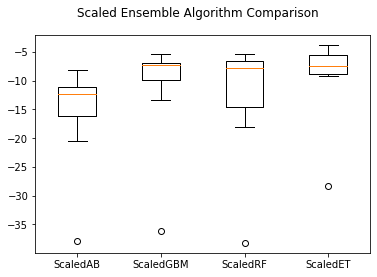

In [38]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

Parece que o Gradient Boosting tem uma pontuação média melhor, também parece que Extra Trees tem uma
distribuição semelhante e talvez uma pontuação mediana melhor.

Provavelmente podemos fazer melhor, visto que as técnicas de ensemble usaram os parâmetros padrão.
Na próxima seção, veremos como ajustar o Gradient Boosting para aumentar ainda mais o desempenho.

O número padrão de estágios de reforço a serem executados (n estimadores) é 100. Essa é uma boa
parâmetro candidato de Gradient Boosting para ajustar. Frequentemente, quanto maior o número de reforços
estágios, melhor o desempenho, mas maior o tempo de treinamento. Nesta seção iremos
veja como ajustar o número de estágios para aumentar o gradiente. Abaixo de nimos uma grade de parâmetros
n valores de estimadores de 50 a 400 em incrementos de 50. Cada configuração é avaliada usando 10 vezes
validação cruzada.

In [39]:
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

Como antes, podemos resumir a melhor configuração e ter uma ideia de como o desempenho
alterado a cada configuração diferente.

In [40]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -10.560638 using {'n_estimators': 400}
-11.629999 (8.833221) with: {'n_estimators': 50}
-11.073455 (8.772155) with: {'n_estimators': 100}
-10.838924 (8.734377) with: {'n_estimators': 150}
-10.785568 (8.657244) with: {'n_estimators': 200}
-10.654778 (8.540552) with: {'n_estimators': 250}
-10.649385 (8.497232) with: {'n_estimators': 300}
-10.589337 (8.413596) with: {'n_estimators': 350}
-10.560638 (8.353747) with: {'n_estimators': 400}


Podemos ver que a melhor configuração foi n estimadores = 400, resultando em uma média quadrada
erro de -9,356471, cerca de 0,65 unidades melhor que o método desafinado.

Em seguida, podemos nalizar o modelo e prepará-lo para uso geral.

#### Finalizar modelo

Nesta seção, vamos finalizar o modelo de aumento de gradiente e avaliá-lo em nosso teste
conjunto de dados de validação. Primeiro, precisamos preparar o modelo e treiná-lo em todo o conjunto de dados de treinamento.
Isso inclui padronizar o conjunto de dados de treinamento antes do treinamento.

In [41]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=400)
model.fit(rescaledX, Y_train)

GradientBoostingRegressor(n_estimators=400, random_state=7)

Podemos então dimensionar as entradas para o conjunto de dados de validação e gerar previsões.

In [42]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))

11.902132586880027


Podemos ver que o erro quadrático médio estimado é de 11.9, próximo de nossa estimativa de -9,3.

In [43]:
%reload_ext watermark
%watermark -gu "caiquemiranda" -iv

Github username: caiquemiranda

pandas    : 1.4.3
matplotlib: 3.5.2
numpy     : 1.23.0



### End.